# **Medicine Resource**


## Exploring Medicine Resource from DBPedia with SparQL, and Plotly.




First, we need to install *matplotlib*, and do some housekeeping to prepare the necessary libraries. We then import *pyplot* and *Basemap*, for generating a geographical map.

In [ ]:
!pip install matplotlib

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Statistics over Linked Data

Here we'll see how we can use standard data analytics over RDF data, via *Pandas*. Pandas is a library for data manipulation and analysis, especially useful for numeric table data.

In [ ]:
import pandas as pd, urllib
from pandas.plotting import scatter_matrix

## Medicine - Dbpedia

In [ ]:
query = """
select distinct ?predicate ?object
where {
dbr:Medicine ?predicate ?object
}
LIMIT 100
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

We read the data from the SPARQL endpoint using it as a REST service. The data is returned in CSV, through implicit content negotiation, and is loaded directly using Pandas.

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                          predicate                                            object
0   http://www.w3.org/1999/02/22-rdf-syntax-ns#type               http://www.w3.org/2002/07/owl#Thing
1   http://www.w3.org/1999/02/22-rdf-syntax-ns#type            http://dbpedia.org/ontology/MusicGenre
2   http://www.w3.org/1999/02/22-rdf-syntax-ns#type      http://dbpedia.org/ontology/MedicalSpecialty
3   http://www.w3.org/1999/02/22-rdf-syntax-ns#type            http://www.wikidata.org/entity/Q930752
4        http://www.w3.org/2000/01/rdf-schema#label                                          Medicine
..                                              ...                                               ...
95     http://dbpedia.org/ontology/wikiPageWikiLink        http://dbpedia.org/resource/Doctors'_trial
96     http://dbpedia.org/ontology/wikiPageWikiLink        http://dbpedia.org/resource/Anesthesiology
97     http://dbpedia.org/ontology/wikiPageWikiLink                http://dbpedia.

## Medicine property - sameAs

In [ ]:
query = """
select distinct ?object
where {
dbr:Medicine owl:sameAs ?object
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                          object
0             http://rdf.freebase.com/ns/m.04sh3
1                 http://d-nb.info/gnd/4038243-6
2           http://fa.dbpedia.org/resource/پزشکی
3       http://war.dbpedia.org/resource/Medisina
4     http://jv.dbpedia.org/resource/Kedhokteran
..                                           ...
116      http://eo.dbpedia.org/resource/Medicino
117      http://ru.dbpedia.org/resource/Медицина
118      http://als.dbpedia.org/resource/Medizin
119  http://qu.dbpedia.org/resource/Hampi_yachay
120     http://scn.dbpedia.org/resource/Midicina

[121 rows x 1 columns]


## Medicine property - academicDiscipline

In [ ]:
query = """
select distinct ?subject
where {
 ?subject dbo:academicDiscipline dbr:Medicine .
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.

param = urllib.parse.urlencode({'query': query})

In [ ]:
query = """
select distinct ?person ?name ?birthPlace ?birthLat ?birthLong ?deathPlace ?deathLat ?deathLong 
where { ?person dbo:academicDiscipline  dbr:Medicine ;
                           dbo:birthPlace ?birthPlace ;
                           dbo:deathPlace ?deathPlace ;
                           dbp:name ?name .
                       ?birthPlace  geo:lat ?birthLat ;
                         geo:long ?birthLong .
                       ?deathPlace geo:lat ?deathLat ;
                                            geo:long ?deathLong .
}

"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

                                                 person  ... deathLong
0                http://dbpedia.org/resource/Love_Gantt  ...  -75.1636
1     http://dbpedia.org/resource/Ludolph_Christian_...  ...    7.1000
2     http://dbpedia.org/resource/Ludolph_Christian_...  ...    7.5500
3           http://dbpedia.org/resource/Luigi_Ferrarese  ...   14.2564
4           http://dbpedia.org/resource/Luigi_Ferrarese  ...   14.2583
...                                                 ...  ...       ...
1239      http://dbpedia.org/resource/William_Bleckwenn  ...  -81.7167
1240      http://dbpedia.org/resource/William_Bleckwenn  ...  -81.7167
1241  http://dbpedia.org/resource/Albert_Ludwig_Sige...  ...   17.0333
1242  http://dbpedia.org/resource/Charles_Russell_Ba...  ...  -89.5000
1243  http://dbpedia.org/resource/Michael_Brown_(phy...  ...    0.0630

[1244 rows x 8 columns]


## Birth place of people which Medicine is their academic discipline

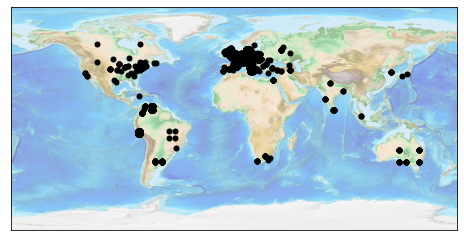

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)

for index, row in data.iterrows():
    x, y = m(row['birthLong'], row['birthLat'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row['name'], fontsize=12);
    plt.text(x, y, '', fontsize=12);

## Death place of people which Medicine is their academic discipline

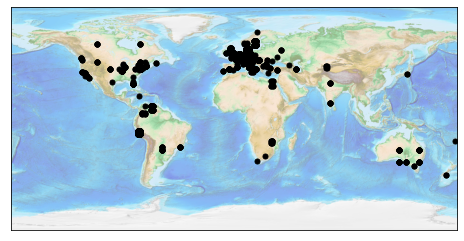

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.etopo(scale=0.5, alpha=0.5)

for index, row in data.iterrows():
    x, y = m(row['deathLong'], row['deathLat'])
    plt.plot(x, y, 'ok', markersize=5)
    #plt.text(x, y, row['name'], fontsize=12);
    plt.text(x, y, '', fontsize=12);

## Medicine property - activeSector

In [ ]:
query = """
select distinct ?activitySectorName ?fieldName 
 where {?Thing dbp:activitySector dbr:Medicine ;
                        dbp:name ?activitySectorName .
                ?field dbp:field ?Thing.
              ?field dbp:name ?fieldName .
FILTER (lang(?activitySectorName ) = 'en')
FILTER (lang(?fieldName ) = 'en')
}
Limit 1100
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)

In [ ]:
data.shape[0]

In [ ]:


data.loc[-1] = ['', 'activitySector']  # adding a row
data.index = data.index + 1  # shifting index
data.sort_index(inplace=True)

col_names =  ['activitySectorName', 'fieldName']
tempDataFrame  = pd.DataFrame(columns = col_names)

for i in range(data.shape[0]):
  tempDataFrame.loc[i] = ['activitySector', str(data['activitySectorName'][i])]


data

,activitySectorName,fieldName
0,,activitySector
1,Rheumatologist,AA amyloidosis
2,Rheumatologist,AL amyloidosis
3,Rheumatologist,Low back pain
4,Pulmonologist,Lung cancer
...,...,...
1096,Psychiatry,Schizoaffective disorder
1097,Psychiatry,Trichophagia
1098,Psychiatry,Sophia Frangou
1099,Physician,Stephen Mackenzie


In [ ]:
tempDataFrame

,activitySectorName,fieldName
0,activitySector,
1,activitySector,Rheumatologist
2,activitySector,Rheumatologist
3,activitySector,Rheumatologist
4,activitySector,Pulmonologist
...,...,...
1096,activitySector,Psychiatry
1097,activitySector,Psychiatry
1098,activitySector,Psychiatry
1099,activitySector,Physician


In [ ]:
tempDataFrame = tempDataFrame.append(data, ignore_index=True)
tempDataFrame = tempDataFrame.drop_duplicates()
tempDataFrame

,activitySectorName,fieldName
0,activitySector,
1,activitySector,Rheumatologist
4,activitySector,Pulmonologist
6,activitySector,Endocrinologist
7,activitySector,Gastroenterologist
...,...,...
2197,Psychiatry,Schizoaffective disorder
2198,Psychiatry,Trichophagia
2199,Psychiatry,Sophia Frangou
2200,Physician,Stephen Mackenzie


## Medicine Diseases based on activity sector - Tree Map

In [ ]:
namesTemp = []
parentsTemp = []
for item in tempDataFrame['fieldName']:
  namesTemp.extend(["" +str(item)])
for item in tempDataFrame['activitySectorName']:
  parentsTemp.extend(["" +item])

In [ ]:
import plotly.express as px
fig = px.treemap(
    names = namesTemp,
    parents = parentsTemp
)
fig.show()

## Medicine property - discipline

In [ ]:
query = """
select distinct  ?name ?impactFactor ?openAccess
where { 
?Thing dbp:discipline dbr:Medicine ;
           dbo:impactFactor ?impactFactor ;
          dbo:openAccessContent ?openAccess ;
           foaf:name ?name .
           
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

## Impact factor of medical jurnals

In [ ]:
import plotly.graph_objects as px
import numpy as np


plot = px.Figure(data=[px.Scatter(
	x=data['name'],
	y=data['impactFactor'],
	mode='markers',)
])

# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			buttons=list([
				dict(
					args=["type", "scatter"],
					label="Scatter Plot",
					method="restyle"
				),
				dict(
					args=["type", "bar"],
					label="Bar Chart",
					method="restyle"
				)
			]),
			direction="down",
		),
	]
)

plot.show()

## Which of the medical jurnals have open access along with their imapct factor

In [ ]:
openAccessUniqueValues =  data['openAccess'].str.lower().unique()

In [ ]:
import plotly.graph_objects as px
import plotly.graph_objs as go
import numpy



plot = px.Figure(data=[go.Bar(
	name='Yes',
	x=data.loc[data['openAccess'] == 'Yes']['name'],
	y=data.loc[data['openAccess'] == 'Yes']['impactFactor']
),
	go.Bar(
	name='Hybrid',
	x=data.loc[data['openAccess'] == 'Hybrid']['name'],
	y=data.loc[data['openAccess'] == 'Hybrid']['impactFactor']
),
	go.Bar(
	name='Hybrid option available to authors',
	x=data.loc[data['openAccess'] == 'Hybrid option available to authors']['name'],
	y=data.loc[data['openAccess'] == 'Hybrid option available to authors']['impactFactor']
),
	go.Bar(
	name='Delayed, after 6 months',
	x=data.loc[data['openAccess'] == 'Delayed, after 6 months']['name'],
	y=data.loc[data['openAccess'] == 'Delayed, after 6 months']['impactFactor']
),
	go.Bar(
	name='Delayed',
	x=data.loc[data['openAccess'] == 'Delayed']['name'],
	y=data.loc[data['openAccess'] == 'Delayed']['impactFactor']
),
	go.Bar(
	name='Yes (since June 2018)',
	x=data.loc[data['openAccess'] == 'Yes (since June 2018)']['name'],
	y=data.loc[data['openAccess'] == 'Yes (since June 2018)']['impactFactor']
),
	go.Bar(
	name='Immediate free access',
	x=data.loc[data['openAccess'] == 'Immediate free access']['name'],
	y=data.loc[data['openAccess'] == 'Immediate free access']['impactFactor']
),
	go.Bar(
	name='Diamond',
	x=data.loc[data['openAccess'] == 'Diamond']['name'],
	y=data.loc[data['openAccess'] == 'Diamond']['impactFactor']
),
	go.Bar(
	name='Yes, noarticle processing charges',
	x=data.loc[data['openAccess'] == 'Yes, noarticle processing charges']['name'],
	y=data.loc[data['openAccess'] == 'Yes, noarticle processing charges']['impactFactor']
),
	go.Bar(
	name='After 12 months',
	x=data.loc[data['openAccess'] == 'After 12 months']['name'],
	y=data.loc[data['openAccess'] == 'After 12 months']['impactFactor']
)
  
])


# Add dropdown
plot.update_layout(
	updatemenus=[
		dict(
			active=0,
			buttons=list([
				dict(label="Both",
					method="update",
					args=[{"visible": [True, True,True, True, True, True, True, True, True, True]},
						{"title": "Both"}]),
				dict(label="Yes",
					method="update",
					args=[{"visible": [True, False, False, False, False, False, False, False, False, False]},
						{"title": "Yes",
							}]),
				dict(label="Hybrid",
					method="update",
					args=[{"visible": [False, True, False, False, False, False, False, False, False, False]},
						{"title": "Hybrid",
							}]),
            dict(label="Hybrid option available to authors",
        method="update",
        args=[{"visible": [False, False, True, False, False, False, False, False, False, False]},
          {"title": "Hybrid option available to authors",
            }]),
            dict(label="Delayed, after 6 months",
        method="update",
        args=[{"visible": [False, False, False, True, False, False, False, False, False, False]},
          {"title": "Delayed, after 6 months",
            }]),
            dict(label="Delayed",
        method="update",
        args=[{"visible": [False, False, False, False, True, False, False, False, False, False]},
          {"title": "Delayed",
            }]),
            dict(label="Yes (since June 2018)",
        method="update",
        args=[{"visible": [False, False, False, False, False, True, False, False, False, False]},
          {"title": "Yes (since June 2018)",
            }]),
             dict(label="Immediate free access",
        method="update",
        args=[{"visible": [False, False, False, False, False, False, True, False,False, False]},
          {"title": "Immediate free access",
            }]),
            dict(label="Diamond",
        method="update",
        args=[{"visible": [False, False, False, False, False, False, False, True, False, False]},
          {"title": "Diamond",
            }]),
             dict(label="Yes, noarticle processing charges",
        method="update",
        args=[{"visible": [False, False, False, False, False, False, False,False, True, False]},
          {"title": "Yes, noarticle processing charges",
            }]),
            dict(label="After 12 months",
        method="update",
        args=[{"visible": [False, False, False, False, False, False, False,False,False, True]},
          {"title": "After 12 months",
            }]),
			]),
		)
	])

plot.show()



## Medicine property - industryof

In [ ]:
query = """
select distinct  ?name  ?abstract ?thumbnail 
 where {?Thing dbo:industry dbr:Medicine ;
                        dbo:abstract ?abstract ;
                        dbp:name ?name .
                         OPTIONAL {?Thing dbo:thumbnail  ?thumbnail .} 
FILTER (lang(?abstract ) = 'en')
FILTER (lang(?name) = 'en')
}
"""
endpoint = "http://dbpedia.org/sparql"

# We need to encode the query string for the HTTP request.
param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

In [ ]:
data = pd.read_csv(endpoint + '?' + param)
print(data)

## Entities from Medical Industry

In [ ]:
!pip install ipyplot

In [ ]:
import ipyplot
from urllib.request import urlopen
from PIL import Image


images_list = []
labels = []
for item in  data['thumbnail'].dropna():
  url = str(item)
  print(url)
  try:
    conn = urllib.request.urlopen(url)
  except urllib.error.HTTPError as e:
      # Return code error (e.g. 404, 501, ...)
      # ...
      print('HTTPError: {}'.format(e.code))
  except urllib.error.URLError as e:
      # Not an HTTP-specific error (e.g. connection refused)
      # ...
      print('URLError: {}'.format(e.reason))
  else:
      # 200
      # ...
      print('good')
      img = Image.open(urlopen(url))
      images_list.extend([img])
      labels.extend(data.loc[data['thumbnail'] == str(item)]['name'])
  #img = Image.open(urlopen(url))
  #images_list.extend([img]) 
#ipyplot.plot_images(images_list, max_images=20, img_width=150)


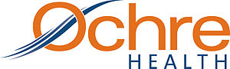
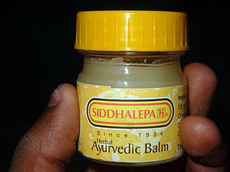
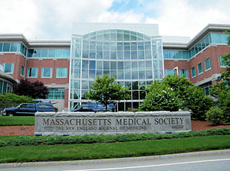
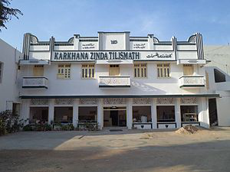


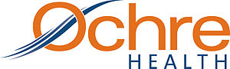
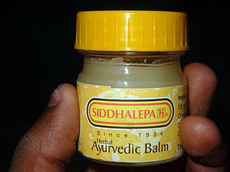
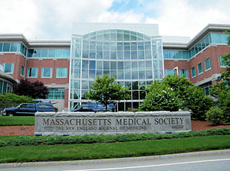
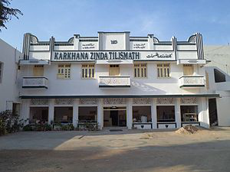

In [ ]:
ipyplot.plot_images(images_list,labels, max_images=20, img_width=230)

In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['Name', 'Abstract'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[data['name'], # 1st column
                       data['abstract']],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# fig.update_layout(width=500, height=300)
fig.show()